## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from scipy.stats import multivariate_normal as mvn

In [2]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'

## Import trainning and tes




In [3]:
data_train=pd.read_csv("/content/drive/MyDrive/Enhance it/Cesar Perez - MNIST_train.csv")

In [4]:
data_test=pd.read_csv("/content/drive/MyDrive/Enhance it/Cesar Perez - MNIST_test.csv")

In [6]:
X_train=data_train.iloc[:,3:]
y_train=data_train.iloc[:,2]

In [7]:
X_test=data_test.iloc[:,3:]
y_test=data_test.iloc[:,2]

In [8]:
class GaussNB():
  def fit(self, X, y, epsilon=1e-3):
    self.likelihoods = dict()
    self.priors=dict()

    self.K=set(y.astype(int))

    for k in self.K:
      X_k=X[y==k, :]
      self.likelihoods[k]={"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0)+epsilon}
      self.priors[k]=len(X_k)/len(X)

  def predict(self,X):

    N,D=X.shape
    P_hat=np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X, l['mean'], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [9]:
class GaussBayes():
  def fit(self, X, y, epsilon=1e-3):
  
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))

    for k in self.K:

      X_k=X[y==k,:]
      N_k, D=X_k.shape
      mu_k=X_k.mean(axis=0)

      self.likelihoods[k]={'mean':X_k.mean(axis=0),'cov':(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)
  
  def predict(self,X):

    N,D=X.shape
    P_hat=np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k]=mvn.logpdf(X, l['mean'], l["cov"])+np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

In [10]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [11]:
gauss=GaussBayes()

In [12]:
gauss.fit((X_train/255).to_numpy(), y_train.to_numpy())

In [15]:
y_hat=gauss.predict(X_test.to_numpy())

In [16]:
accuracy( y_test.to_numpy(), y_hat)

0.8615

In [17]:
y_hat=pd.DataFrame(y_hat, columns=["y_hat"])

In [19]:
y_test=pd.DataFrame(y_test)

In [20]:
confusion_matrix=pd.concat([y_hat,y_test], axis=1)

In [21]:
confusion_matrix

,y_hat,labels
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [22]:
y=[]
for j in range(10):
  x=[]
  for i in range(10):
    a=confusion_matrix[(confusion_matrix["y_hat"]==j)
    &(confusion_matrix["labels"]==i)].shape[0]
    x.append(a)
  y.append(x)
y

[[939, 0, 3, 3, 0, 4, 10, 0, 6, 4],
 [0, 546, 0, 0, 0, 0, 0, 0, 0, 0],
 [9, 50, 984, 24, 24, 9, 13, 17, 20, 6],
 [6, 4, 10, 908, 1, 42, 0, 12, 23, 13],
 [0, 8, 1, 1, 923, 2, 5, 24, 3, 36],
 [5, 0, 0, 10, 0, 748, 21, 1, 6, 1],
 [3, 7, 1, 0, 1, 6, 880, 0, 0, 0],
 [1, 0, 3, 4, 5, 1, 0, 903, 4, 23],
 [17, 520, 30, 57, 22, 76, 29, 32, 910, 52],
 [0, 0, 0, 3, 6, 4, 0, 39, 2, 874]]

In [23]:
confusion_matrix[(confusion_matrix["y_hat"]==0)&(confusion_matrix["labels"]==0)]

,y_hat,labels
3,0,0
10,0,0
13,0,0
25,0,0
28,0,0
...,...,...
9952,0,0
9962,0,0
9964,0,0
9983,0,0


In [22]:
confusion_matrix=pd.DataFrame(y)

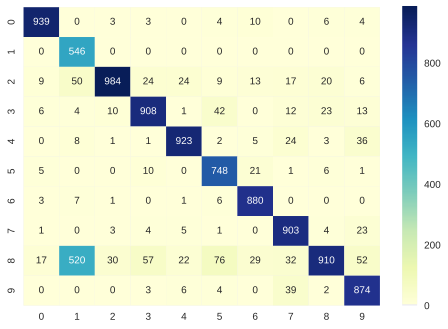

In [86]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d");